#  Task 1: Investigate and analyze price data

<ipython-input-2-4ac9fc328358>:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(StringIO(data), parse_dates=['Dates'], dayfirst=False) # Use StringIO from io module
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


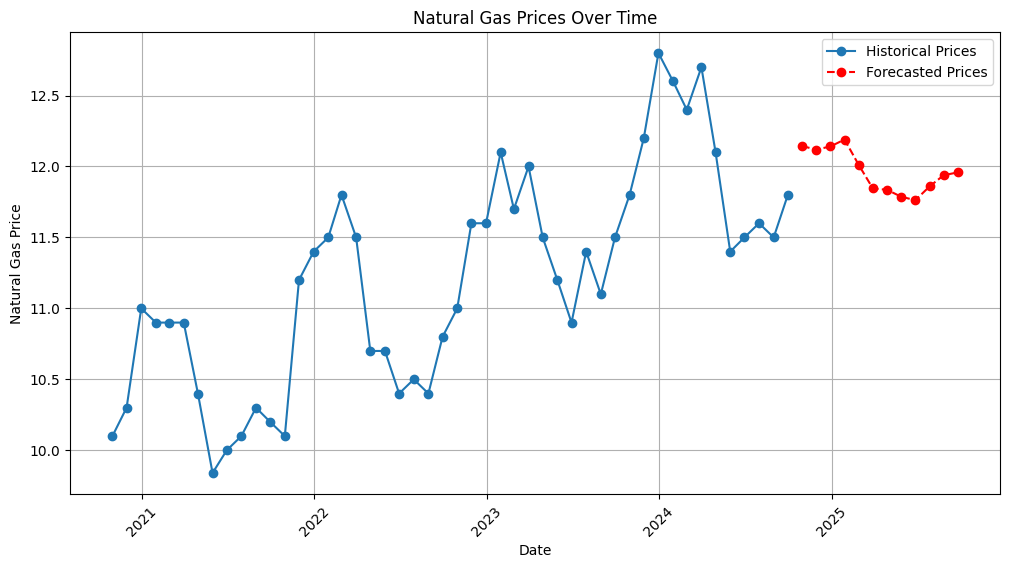

Date out of forecast range


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
from io import StringIO # Import StringIO from io module

# Load data
data = """Dates,Prices
10/31/20,10.1
11/30/20,10.3
12/31/20,11.0
1/31/21,10.9
2/28/21,10.9
3/31/21,10.9
4/30/21,10.4
5/31/21,9.84
6/30/21,10.0
7/31/21,10.1
8/31/21,10.3
9/30/21,10.2
10/31/21,10.1
11/30/21,11.2
12/31/21,11.4
1/31/22,11.5
2/28/22,11.8
3/31/22,11.5
4/30/22,10.7
5/31/22,10.7
6/30/22,10.4
7/31/22,10.5
8/31/22,10.4
9/30/22,10.8
10/31/22,11.0
11/30/22,11.6
12/31/22,11.6
1/31/23,12.1
2/28/23,11.7
3/31/23,12.0
4/30/23,11.5
5/31/23,11.2
6/30/23,10.9
7/31/23,11.4
8/31/23,11.1
9/30/23,11.5
10/31/23,11.8
11/30/23,12.2
12/31/23,12.8
1/31/24,12.6
2/29/24,12.4
3/31/24,12.7
4/30/24,12.1
5/31/24,11.4
6/30/24,11.5
7/31/24,11.6
8/31/24,11.5
9/30/24,11.8"""

# Convert to DataFrame
df = pd.read_csv(StringIO(data), parse_dates=['Dates'], dayfirst=False) # Use StringIO from io module
df.set_index('Dates', inplace=True)

# Interpolation function
def estimate_past_price(date_str):
    date = pd.to_datetime(date_str)
    interp_func = interp1d(df.index.astype(int), df['Prices'], kind='linear', fill_value='extrapolate')
    return interp_func(date.timestamp())

# Forecasting future prices
model = ARIMA(df['Prices'], order=(5,1,0))
model_fit = model.fit()
future_dates = [df.index[-1] + timedelta(days=30 * i) for i in range(1, 13)]
future_forecast = model_fit.forecast(steps=12)

# Visualizing the data
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Prices'], marker='o', label='Historical Prices')
plt.plot(future_dates, future_forecast, marker='o', linestyle='dashed', color='red', label='Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Natural Gas Price')
plt.title('Natural Gas Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Function to get estimated price
def get_price(date_str):
    date = pd.to_datetime(date_str)
    if date in df.index:
        return df.loc[date, 'Prices']
    elif date < df.index[0]:
        return estimate_past_price(date_str)
    elif date > df.index[-1]:
        future_df = pd.DataFrame({'Dates': future_dates, 'Prices': future_forecast})
        future_df.set_index('Dates', inplace=True)
        return future_df.loc[date, 'Prices'] if date in future_df.index else 'Date out of forecast range'
    else:
        return 'Invalid date'

# Example usage
print(get_price('2025-06-30'))


# Task 2: prototype pricing model

<ipython-input-5-8f6c1c099378>:60: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(StringIO(data), parse_dates=['Dates'], dayfirst=False) # Use StringIO from io module
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


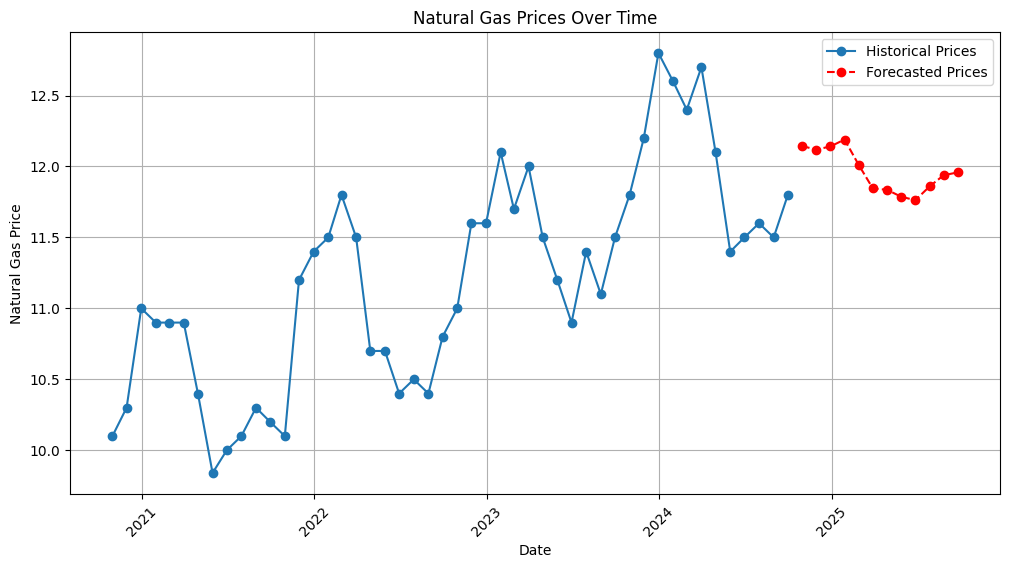

-11550.0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

# Load data
data = """Dates,Prices
10/31/20,10.1
11/30/20,10.3
12/31/20,11.0
1/31/21,10.9
2/28/21,10.9
3/31/21,10.9
4/30/21,10.4
5/31/21,9.84
6/30/21,10.0
7/31/21,10.1
8/31/21,10.3
9/30/21,10.2
10/31/21,10.1
11/30/21,11.2
12/31/21,11.4
1/31/22,11.5
2/28/22,11.8
3/31/22,11.5
4/30/22,10.7
5/31/22,10.7
6/30/22,10.4
7/31/22,10.5
8/31/22,10.4
9/30/22,10.8
10/31/22,11.0
11/30/22,11.6
12/31/22,11.6
1/31/23,12.1
2/28/23,11.7
3/31/23,12.0
4/30/23,11.5
5/31/23,11.2
6/30/23,10.9
7/31/23,11.4
8/31/23,11.1
9/30/23,11.5
10/31/23,11.8
11/30/23,12.2
12/31/23,12.8
1/31/24,12.6
2/29/24,12.4
3/31/24,12.7
4/30/24,12.1
5/31/24,11.4
6/30/24,11.5
7/31/24,11.6
8/31/24,11.5
9/30/24,11.8"""

# Convert to DataFrame
df = pd.read_csv(StringIO(data), parse_dates=['Dates'], dayfirst=False) # Use StringIO from io module
df.set_index('Dates', inplace=True)

# Interpolation function
def estimate_past_price(date_str):
    date = pd.to_datetime(date_str)
    interp_func = interp1d(df.index.astype(int), df['Prices'], kind='linear', fill_value='extrapolate')
    return interp_func(date.timestamp())

# Forecasting future prices
model = ARIMA(df['Prices'], order=(5,1,0))
model_fit = model.fit()
future_dates = [df.index[-1] + timedelta(days=30 * i) for i in range(1, 13)]
future_forecast = model_fit.forecast(steps=12)

# Visualizing the data
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Prices'], marker='o', label='Historical Prices')
plt.plot(future_dates, future_forecast, marker='o', linestyle='dashed', color='red', label='Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Natural Gas Price')
plt.title('Natural Gas Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Function to get estimated price
def get_price(date_str):
    date = pd.to_datetime(date_str)
    if date in df.index:
        return df.loc[date, 'Prices']
    elif date < df.index[0]:
        return estimate_past_price(date_str)
    elif date > df.index[-1]:
        future_df = pd.DataFrame({'Dates': future_dates, 'Prices': future_forecast})
        future_df.set_index('Dates', inplace=True)
        return future_df.loc[date, 'Prices'] if date in future_df.index else 'Date out of forecast range'
    else:
        return 'Invalid date'

# Contract pricing function
def price_contract(injection_dates, withdrawal_dates, injection_rate, withdrawal_rate, max_volume, storage_cost):
    volume = 0
    total_cost = 0
    total_revenue = 0

    for date in injection_dates:
        price = get_price(date)
        if isinstance(price, str):
            continue
        volume = min(volume + injection_rate, max_volume)
        total_cost += injection_rate * price

    for date in withdrawal_dates:
        price = get_price(date)
        if isinstance(price, str):
            continue
        total_revenue += min(volume, withdrawal_rate) * price
        volume -= min(volume, withdrawal_rate)

    storage_fees = storage_cost * max_volume
    contract_value = total_revenue - total_cost - storage_fees

    return contract_value

# Example test case
injection_dates = ['2024-06-30', '2024-07-31']
withdrawal_dates = ['2024-09-30', '2024-10-31']
injection_rate = 1000
withdrawal_rate = 1000
max_volume = 5000
storage_cost = 0.05

print(price_contract(injection_dates, withdrawal_dates, injection_rate, withdrawal_rate, max_volume, storage_cost))


# Task 3: estimate the probability of default for a borrower

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

def train_default_model(data):
    #load data
    data_path = '/content/data.csv'
    df = pd.read_csv(data_path)


    # Features and target
    X = df.drop(columns=["customer_id", "default"])
    y = df["default"]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate model
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))

    return model

def predict_expected_loss(model, loan_details):
    # Convert dictionary to DataFrame with the same feature order used during training
    df = pd.DataFrame([loan_details])  # Convert dict to DataFrame
    probability_of_default = model.predict_proba(df)[0][1]  # Get PD (probability of default)
    recovery_rate = 0.1
    expected_loss = loan_details["loan_amt_outstanding"] * (1 - recovery_rate) * probability_of_default
    return expected_loss

# Example usage
sample_loan = {
    "credit_lines_outstanding": 2,
    "loan_amt_outstanding": 5000,
    "total_debt_outstanding": 10000,
    "income": 60000,
    "years_employed": 5,
    "fico_score": 650
}

loss = predict_expected_loss(model, sample_loan)
print("Expected Loss:", loss)

Expected Loss: 0.0


# Task 4: strategically bucket customers with various FICO scores in order to narrow in on the probability of default

In [9]:
import pandas as pd
import numpy as np

# Load data
file_path = "/content/data.csv"
df = pd.read_csv(file_path)

# Number of buckets (e.g., 5 categories from best to worst credit)
num_buckets = 5

# Compute quantile bins for FICO scores
df["rating"] = pd.qcut(df["fico_score"], num_buckets, labels=range(num_buckets, 0, -1))

# Create a rating map (FICO Score -> Rating)
rating_map = dict(zip(df["fico_score"], df["rating"]))

# Function to get rating for a new FICO score
def get_credit_rating(fico_score):
    # Find the closest existing score in the rating map
    closest_score = min(rating_map.keys(), key=lambda x: abs(x - fico_score))
    return rating_map[closest_score]

# Example usage
example_fico_scores = [500, 620, 700, 750, 800]
for fico in example_fico_scores:
    print(f"FICO Score: {fico}, Rating: {get_credit_rating(fico)}")


FICO Score: 500, Rating: 5
FICO Score: 620, Rating: 4
FICO Score: 700, Rating: 1
FICO Score: 750, Rating: 1
FICO Score: 800, Rating: 1
